In [1]:
# Linear regression with tf

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import xlrd

In [61]:
DATA_FILE = "/Users/daniel/Desktop/fun/stanford-tensorflow-tutorials-master/data/fire_theft.xls"

In [62]:
# Read data
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [63]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

In [64]:
# w = tf.Variable(0.0, name='weights')
# b = tf.Variable(0.0, name='bias')
# Try with a quadratic loss:
w = tf.Variable(0.0, name='weights_1')
u = tf.Variable(0.0, name='weights_2')
b = tf.Variable(0.0, name='bias')

In [65]:
# Y_predicted = X * w  + b
Y_predicted = X * X * w + X * u + b

In [66]:
loss = tf.square(Y - Y_predicted, name="loss")

In [67]:
# linear optimization
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
# quadratic optimization: decrease learning rate...
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00000001).minimize(loss)

In [68]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100): # run 100 epochs
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        print('Epoch {0}: loss {1}'.format(i, total_loss/n_samples))
    
    w_value, u_value, b_value = sess.run([w, u, b])

Epoch 0: loss 1540.62227857
Epoch 1: loss 1310.39377935
Epoch 2: loss 1146.47604901
Epoch 3: loss 1029.78452404
Epoch 4: loss 946.724612917
Epoch 5: loss 887.613168985
Epoch 6: loss 845.553270658
Epoch 7: loss 815.632835746
Epoch 8: loss 794.35340257
Epoch 9: loss 779.223670871
Epoch 10: loss 768.469805377
Epoch 11: loss 760.828895901
Epoch 12: loss 755.401769329
Epoch 13: loss 751.54856478
Epoch 14: loss 748.813789725
Epoch 15: loss 746.873438765
Epoch 16: loss 745.497078495
Epoch 17: loss 744.52075306
Epoch 18: loss 743.828112774
Epoch 19: loss 743.336186226
Epoch 20: loss 742.986343088
Epoch 21: loss 742.736793555
Epoch 22: loss 742.557934172
Epoch 23: loss 742.428849945
Epoch 24: loss 742.33474732
Epoch 25: loss 742.265070114
Epoch 26: loss 742.212357198
Epoch 27: loss 742.171501206
Epoch 28: loss 742.138838075
Epoch 29: loss 742.111687112
Epoch 30: loss 742.088336464
Epoch 31: loss 742.067557476
Epoch 32: loss 742.048408415
Epoch 33: loss 742.030343813
Epoch 34: loss 742.012976461

In [69]:
print(loss)

Tensor("loss_5:0", dtype=float32)


In [70]:
w_value

0.067708224

In [71]:
u_value

0.010697876

In [72]:
b_value

0.0014704196

In [36]:
print(Y_predicted)

Tensor("add_4:0", dtype=float32)


In [73]:
actual_x, actual_y = data.T

In [74]:
# linear prediction
# pred_y = w_value * actual_x  + b_value
# quadratic
pred_y = w_value * actual_x * actual_x + u_value * actual_x  + b_value

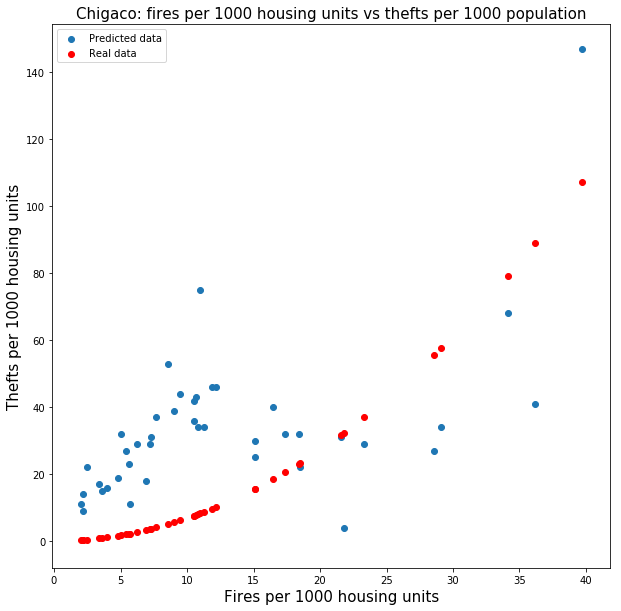

In [76]:
plt.figure(figsize=(10,10))
plt.scatter(x=actual_x, y=actual_y)
# plt.plot(actual_x, pred_y, c='r')
plt.scatter(x=actual_x, y=pred_y, c='r')
plt.title('Chigaco: fires per 1000 housing units vs thefts per 1000 population', fontsize=15)
plt.xlabel('Fires per 1000 housing units', fontsize=15)
plt.ylabel('Thefts per 1000 housing units', fontsize=15)
plt.legend(loc='best', labels=['Predicted data', 'Real data'])

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
mean_squared_error(actual_y, pred_y)

736.21642156891528